# Предсказание погоды в Сиэтле

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

Извлечём данные из таблицы

In [2]:
df_seattle = pd.read_csv('seattleWeather_1948-2017.csv')
df_seattle

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


Произведём очистку данных (нормализация + проверка на отсутствующие значения)

In [3]:
df_seattle.info()  # проверим какие значения содержатся в данных и их тип

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


Видим, что всего данных 25551, а в поле PRCP и RAIN их всего 25548. Значит где-то отсутствуют значения. Также поля RAIN и DATE имеют тип object, что будет неудобно для последующих вычислений.

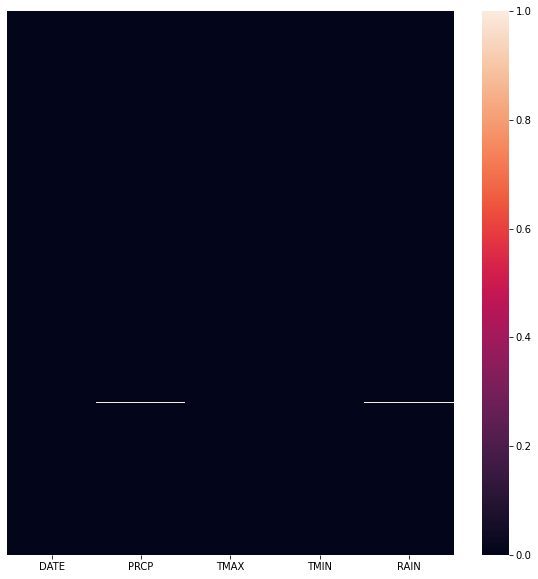

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df_seattle),yticklabels=False)

По графику мы и видим, что отсутствуют значения в полях PRCP и RAIN

In [5]:
for df_seattle_col in ['PRCP','RAIN']:
    print(df_seattle[pd.isnull(df_seattle[df_seattle_col])])

             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN
             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN


В этих полях отсутствуют три значения за дату 1998-06-02, 1998-06-03, 2005-09-05.

Определим, что делать с отсутствующими значениями (удалять ли их или заменять на средние значения).

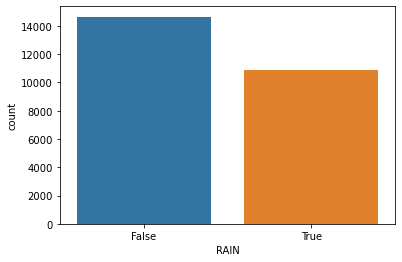

In [6]:
sns.countplot(data=df_seattle, x='RAIN')

По данным видно, что больше шансов отсутствия дождя. Потому будет разумным в отсутствующие строки вставить значение False, нежели удалять данные.
Отсутствие осадков характерно, тк засушливых дней больше. В частве данных в колонку осадков PRCP вставим среднее значение.

In [7]:
df_seattle['PRCP'].mean()

0.10622162204477956

In [8]:
def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df_seattle['PRCP'].mean()
    else:
        return PRCP

In [9]:
def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return 'False'
    else:
        return RAIN

In [10]:
df_seattle['PRCP'] = df_seattle[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [11]:
df_seattle['RAIN']=df_seattle[['RAIN']].apply(RAIN_INSERTION,axis=1)

Проверим, имеются ли теперь отсутствующие данные.

In [12]:
for df_seattle_col in ['PRCP','RAIN']:
    print(df_seattle[pd.isnull(df_seattle[df_seattle_col])])

Empty DataFrame
Columns: [DATE, PRCP, TMAX, TMIN, RAIN]
Index: []
Empty DataFrame
Columns: [DATE, PRCP, TMAX, TMIN, RAIN]
Index: []


Проведём дальнейший анализ. Рассмотрим зависимость параметров друг от друга. И проверим имеется ли сильный разброс наших данных.

Text(0.5, 1.0, 'Precipitation Vs Minimum Temperature')

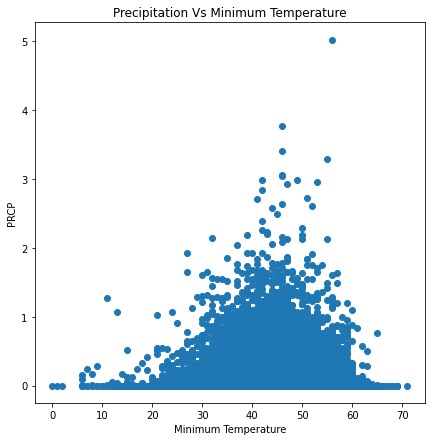

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(x = 'TMIN',y = 'PRCP',data = df_seattle)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Minimum Temperature')

Text(0.5, 1.0, 'Precipitation Vs Maximum Temperature')

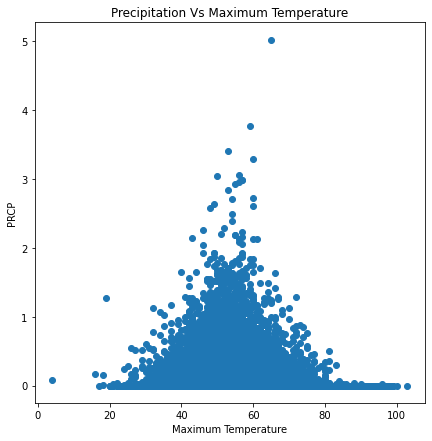

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(x = 'TMAX',y = 'PRCP',data=df_seattle)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('Precipitation Vs Maximum Temperature')

Далее заменим значения в столбце RAIN (1 если оно = True, иначе на 0). Так как нам необходимо работать с численными значениями.

In [15]:
df_seattle.RAIN = [1 if each == True  else 0 for each in df_seattle.RAIN.values]

C:\Users\apenk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


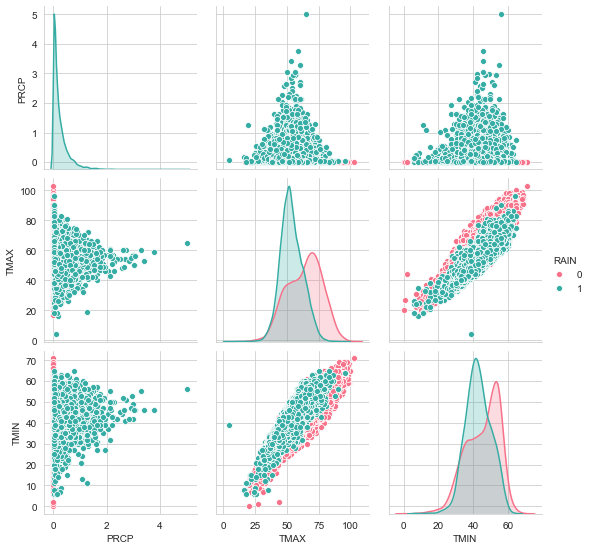

In [16]:
import seaborn as sb
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6, 5

sb.set_style('whitegrid')

sb.pairplot(df_seattle, palette = 'husl', hue = 'RAIN')
plt.show()

Произведём подсчет, среднее значение, стандартное отклонение, минимум, 25-й процентиль, 50-й процентиль (или медиана), 75-й процентиль и максимальное значение.

In [17]:
df_seattle.describe()

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226,0.426598
std,0.239017,12.772984,8.892836,0.494592
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


Среднее, минимальное и максимальное значения каждой переменной являются разумными, что означает, что в данных не должно быть ошибок (например, очень высокая температура 200 F).

Посмотрим не связаны ли между собой какие-либо атрибуты. 
Сделать это можно рассчитав коэффициенты корреляции для всех столбцов. 

Знак значения корреляции означает, увеличивается ли одна переменная по мере того, как увеличивается другая (положительный), или уменьшается ли одна переменная по мере того, как увеличивается другая (отрицательный).

Если значение корреляции = 0 (или близко к нулю), то линейной корреляции нет (хотя может быть нелинейное соотношение). Чем ближе значение к крайним точкам (±1), тем больше степень линейной связи.

In [18]:
df_seattle.corr()  

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.226728,-0.064363,0.515138
TMAX,-0.226728,1.000000,0.860684,-0.389287
TMIN,-0.064363,0.860684,1.000000,-0.139975
RAIN,0.515138,-0.389287,-0.139975,1.000000


Видим, что при увеличении температур, количество осадков уменьшается (что видно и из графиков выше).

Видим, что TMIN и TMAX сильно коррелированы, поэтому мы отбрасываем TMIN, который имеет более низкую корреляцию с RAIN.

Мы также должны отбросить переменную «PRCP»: если мы знаем количество осадков в каждый день, мы определенно можем сказать, идет ли дождь в этот день или нет.

Сформируем две таблицы для дальнейшей работы с данными

In [19]:
X = df_seattle.drop(['RAIN','DATE', 'TMIN', 'PRCP'],axis=1)
y = df_seattle['RAIN']  # Отделим от нашей выборки прогнозные значения

# формируем таблицу Х, которую будем использовать для построения прогноза, исключая из неё поля RAIN и DATE
# таблица у будет состоять из поля RAIN, тк она определяет, будет ли дождь

В Соединенных Штатах, осадки представлены в дюймах в 24-часовой период. А наша температура в градусах по Фаренгейту. 

Произведём нормировку наших данных. Нормирование данных заключается в приведении диапазона изменения значений признаков к некоторым требуемым границам (например, от 0 до 1). Произведём "Линейное нормирование". 

In [20]:
X = (X - np.min(X))/(np.max(X) - np.min(X)).values
X

,TMAX
0,0.474747
1,0.414141
2,0.414141
3,0.414141
4,0.414141
...,...
25546,0.454545
25547,0.454545
25548,0.424242
25549,0.444444


# Строим модель множественной линейной регресии

Для задачи прогнозирования значений выбираем модель множественной линейной регрессии.

Прогностическое моделирование в первую очередь касается минимизации ошибки модели или, другими словами, как можно более точного прогнозирования.

Линейную регрессию можно представить в виде уравнения, которое описывает прямую, наиболее точно показывающую взаимосвязь между входными переменными X и выходными переменными Y. Для составления этого уравнения нужно найти определённые коэффициенты B для входных переменных.

In [21]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [22]:
X = sm.add_constant(X) # добавили 1 в начало матрицы 
X
# единица соответствует переменной при свободном члене b0

,const,TMAX
0,1.0,0.474747
1,1.0,0.414141
2,1.0,0.414141
3,1.0,0.414141
4,1.0,0.414141
...,...,...
25546,1.0,0.454545
25547,1.0,0.454545
25548,1.0,0.424242
25549,1.0,0.444444


Дробим выборку на тренировочнуюи тестовую

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# размер тестовой выборки  = 20% данных, тренировочная выборка = 80%

Реализуем вручную алгоритм линейной регресии

In [24]:
def Linear_Regression(data_train, data_predict):    
    # преобразовываем данные к типу matrix для удобной работы с матрицами
    
    X_matrix = np.matrix(data_train)  
    Y_matrix = np.matrix(data_predict)
    
    X_t = X_matrix.T                           # транспонируем X_matrix
    X_inv = np.linalg.inv(np.dot(X_t,X_matrix))       # находим обратную матрицу к (X_matrix * X_t)
    
    Right_matrix = np.dot(X_t, Y_matrix.T )    # находим правую часть = X_t * Y_matrix
    B = np.dot(X_inv , Right_matrix )                  # находим коэффициенты уравнения линейной регрессии и выводим их
    print('The linear model is: Y = {0} + {1}*TMAX '.format(B[0,0], B[1,0]))
    
    return B;

In [25]:
def Prediction(x_test, coeff):
    X_matrix = np.matrix(x_test)
    reg_coeff = np.matrix(coeff)
    
    return X_matrix*reg_coeff;

Получаем матрицу коэффициентов линейной регрессии и уравнение

In [26]:
reg_coeff = Linear_Regression(x_train, y_train)
reg_coeff

The linear model is: Y = 1.260181171623998 + -1.4837652646424875*TMAX 


matrix([[ 1.26018117],
        [-1.48376526]])

Выведем предсказание выборки y_train и сравним её с реальными данными

In [27]:
Prediction(x_train, reg_coeff)

matrix([[0.40589208],
        [0.66068005],
        [0.33095444],
        ...,
        [0.33095444],
        [0.40589208],
        [0.2560168 ]])

In [28]:
y_train

4879     0
18603    1
7451     0
3941     0
11501    0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: RAIN, Length: 20440, dtype: int64

Теперь сделаем предсказание погоды по выборке x_test

In [29]:
pred = Prediction(x_test, reg_coeff)
pred

matrix([[0.630705  ],
        [0.2560168 ],
        [0.40589208],
        ...,
        [0.19606669],
        [0.12112905],
        [0.72063017]])

In [30]:
y_test

5816     1
25051    1
512      1
10870    0
4306     0
        ..
19081    1
8574     0
14452    0
3115     0
10620    0
Name: RAIN, Length: 5111, dtype: int64

Выясним точность алгоритма линейной регрессии

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print('MSE: %.3f, MAE: %.3f' % (mse, mae))

MSE: 0.205, MAE: 0.415


Т.е. точность составляет всего 58%

Наш алгоритм может правильно предсказывать дождь в 58% раз для тестовых наборов данных.

Это лучше, чем базовый уровень: мы должны быть в состоянии предсказать дождь с точностью 50%, только подбрасывая монету. Причем 57% случаев без дождя и 43% случаев дождя. Пока что мы улучшили показатель точности на 10%.

Ограниченное количество предикторов и крайне неопределенный и нелинейный характер погоды очень затрудняют повышение показателя точности до уровня выше ~ 85%. Если бы это было возможно, не было бы необходимости в сверхсложных моделях численного прогнозирования погоды, которые используют тысячи процессов и математических моделей и в настоящее время широко используются для прогнозов погоды с высокой точностью.

Достигнуть точности выше 90% невозможно, тк необходимо исключить переменную «PRCP» из списка предикторов. 

Для сравнения точности алгоритмов, воспользуемся готовой библиотекой для реализации алгоритма "Случайного леса"

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [33]:
# для работы алгоритма нужно удалить столбец с константой

x_train = x_train.drop(columns = ['const'])
x_train

,TMAX
4879,0.575758
18603,0.404040
7451,0.626263
3941,0.565657
11501,0.737374
...,...
21575,0.404040
5390,0.555556
860,0.626263
15795,0.575758


In [34]:
x_test = x_test.drop(columns = ['const'])
x_test

,TMAX
5816,0.424242
25051,0.676768
512,0.575758
10870,0.606061
4306,0.555556
...,...
19081,0.484848
8574,0.616162
14452,0.717172
3115,0.767677


In [35]:
# подставляем данные в модель
clf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
#Prediction on test data
pred_RFC = clf.predict(x_test)
pred_RFC

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
y_test

5816     1
25051    1
512      1
10870    0
4306     0
        ..
19081    1
8574     0
14452    0
3115     0
10620    0
Name: RAIN, Length: 5111, dtype: int64

In [38]:
# отчёт
from sklearn import metrics
print(metrics.classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69      2957
           1       0.60      0.77      0.67      2154

    accuracy                           0.68      5111
   macro avg       0.69      0.70      0.68      5111
weighted avg       0.71      0.68      0.68      5111



Мы получили 68% точность предсказания, используя модель случайного леса.

# Попытаемся улучшить значение предсказания

Создадим новые переменные на основе доступных столбцов, чтобы повысить показатель точности.

Правильное использование PRCP:

1) Мы знаем PRCP за последние несколько дней (например, 1-3 января). Как это может помочь предсказать «RAIN» на сегодня (например, 4 января)?

2) Нам известны PRCP на 4 января за все предыдущие годы 1948-2017. Можем ли мы использовать эти данные для прогнозирования дождя на 4 января 2018 года?

Неправильное использование PRCP:

Мы знаем PRCP на 4 января 2018 года. Можем ли мы использовать его для прогнозирования «RAIN» на 4 января 2018 года?
В этом случае алгоритм предоставит идеальный ответ, когда результат будет включен в число столбцов для предсказания: когда алгоритм знает количество осадков в конкретный день, оно определенно может сказать, идет ли дождь или нет.

_______________________________________________________________________________________________________________________________

TMAX и TMIN сильно коррелированы, и по крайней мере одну из них следует отбросить.
Есть ли способ вывести новые переменные, которые имеют более высокую корреляцию с RAIN, и в то же время сохранить информацию как из TMAX, так и из TMIN?

Введём (T_DIFF = TMAX - TMIN) и (T_RATIO = TMAX / TMIN). Эти новые переменные должны иметь более высокую корреляцию с 'RAIN', потому что, когда идет дождь, суточные изменения температуры меньше колеблются, и TMAX и TMIN становятся ближе. Следовательно, T_DIFF (T_RATIO) становится меньше (больше). 

Для прохождения циклона над определенным местом требуется около недели. Представьте, что циклон вызывает дождь над Сиэтлом в течение недели. Я предполагаю среднее состояние, то есть сегодня четвертый дождливый день из этой системы. Другими словами, последние 3 дня были дождливыми, и следующие 3 дня также будут дождливыми.

Итак, я прихожу к выводу, что если я знаю PRCP за последние 3 дня, я могу предсказать RAIN на сегодня. 

1) Поэтому я извлекаю переменную «среднее количество осадков за последние n дней» (PRCP_n), где n = 3. Например, я знаю средний PRCP за 1-3 января 2017 года. Каков прогнозируемый RAIN на 4 января 2017 года?

2) Представьте, что сегодня 4 января 2018 года. Если 4 января все предыдущие годы было дождливым, велика вероятность, что сегодня будет дождь. Хотелось бы использовать средний PRCP за 4 января с 1948 по 2017 год и спрогнозировать RAIN на сегодня. Итак, вычисляем новую переменную daily_PRCP (средний PRCP в определенный день за все годы).

In [39]:
date = pd.to_datetime(df_seattle.DATE, format="%Y-%m-%d")
df_seattle['DATE'] = date
df_seattle.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [40]:
# T_RATIO
T_RATIO =  df_seattle.TMIN / df_seattle.TMAX
T_RATIO[T_RATIO > 1]  = 1 # исправление ошибки в исходных данных, где TMIN > TMAX

# PRCP в последние n дней (здесь, n = 3)
n = 3
PRCP_n = np.empty(len(df_seattle.PRCP))
PRCP_n[:] = 0
PRCP_n = [sum(df_seattle.PRCP.values[i-n:i]) / n for i in range(n, len(df_seattle.PRCP.values))]

# средний PRCP в определенный день за все годы
from datetime import datetime
DoY_str = df_seattle.DATE.dt.strftime('%j')
Day_of_Year = [int(a) for a in DoY_str]
# группируем данные по "день года"
groupD     = df_seattle.groupby(Day_of_Year)
DoY_PRCP   = groupD['PRCP'].mean()  # дневное климатическое среднее PRCP
daily_PRCP = [DoY_PRCP[a] for a in Day_of_Year]

In [41]:
# добавим все эти столбцы в исходный DataFrame:
T_RATIO_df     = pd.DataFrame(T_RATIO,     columns = ['T_RATIO'])
PRCP_n_df      = pd.DataFrame(PRCP_n,      columns = ['PRCP_n'])
daily_PRCP_df  = pd.DataFrame(daily_PRCP,  columns = ['daily_PRCP'])

df_seattle_new = pd.concat([df_seattle['DATE'],df_seattle['PRCP'],PRCP_n_df,daily_PRCP_df,
                        df_seattle['TMAX'],df_seattle['TMIN'],T_RATIO_df,df_seattle['RAIN']], axis = 1)

df_seattle_new.PRCP_n.fillna(df_seattle_new.PRCP.median(), inplace = True)

df_seattle_new.describe(include = 'all') # покажем иснформацию 

,DATE,PRCP,PRCP_n,daily_PRCP,TMAX,TMIN,T_RATIO,RAIN
count,25551,25551.000000,25551.000000,25551.000000,25551.000000,25551.000000,25551.000000,25551.000000
unique,25551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1968-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1948-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.106222,0.106202,0.106222,59.544206,44.514226,0.753182,0.426598
std,NaN,0.239017,0.169746,0.066579,12.772984,8.892836,0.084432,0.494592
min,NaN,0.000000,0.000000,0.002857,4.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.049286,50.000000,38.000000,0.694444,0.000000


In [42]:
df_seattle_new

,DATE,PRCP,PRCP_n,daily_PRCP,TMAX,TMIN,T_RATIO,RAIN
0,1948-01-01,0.47,0.493333,0.166571,51,42,0.823529,1
1,1948-01-02,0.59,0.440000,0.234571,45,36,0.800000,1
2,1948-01-03,0.42,0.300000,0.142143,45,35,0.777778,1
3,1948-01-04,0.31,0.306667,0.206571,45,34,0.755556,1
4,1948-01-05,0.17,0.340000,0.210429,45,32,0.711111,1
...,...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,0.000000,0.229714,49,34,0.693878,0
25547,2017-12-11,0.00,0.000000,0.214143,49,29,0.591837,0
25548,2017-12-12,0.00,0.000000,0.260571,46,32,0.695652,0
25549,2017-12-13,0.00,0.000000,0.200000,48,34,0.708333,0


C:\Users\apenk\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


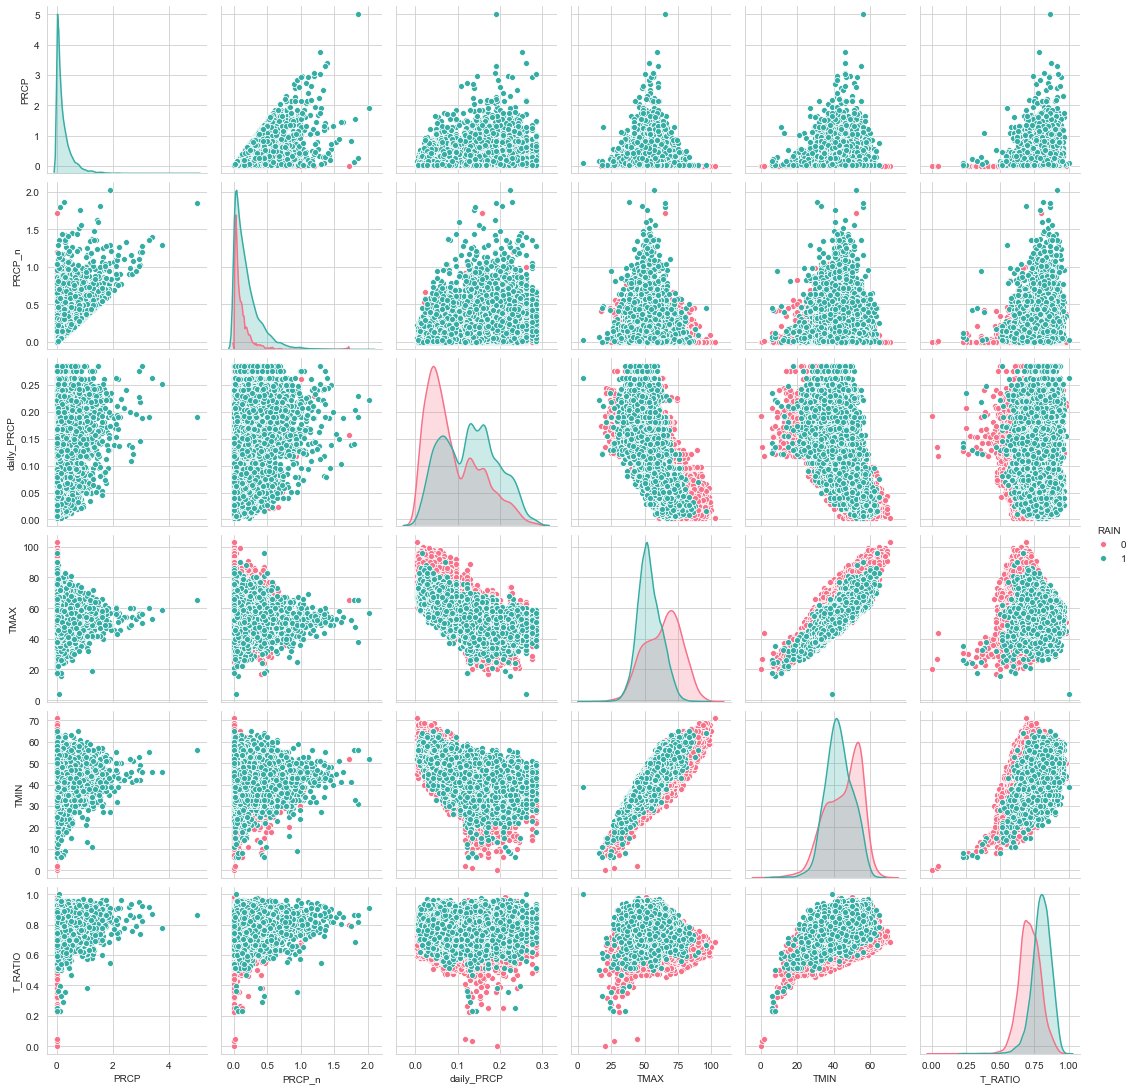

In [43]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

sb.pairplot(df_seattle_new, palette = 'husl', hue = 'RAIN')
plt.show()

In [44]:
df_seattle_new.corr()

,PRCP,PRCP_n,daily_PRCP,TMAX,TMIN,T_RATIO,RAIN
PRCP,1.000000,0.687040,0.278552,-0.226728,-0.064363,0.326867,0.515138
PRCP_n,0.687040,1.000000,0.358772,-0.305481,-0.158830,0.305795,0.464478
daily_PRCP,0.278552,0.358772,1.000000,-0.745134,-0.678712,0.199875,0.303185
TMAX,-0.226728,-0.305481,-0.745134,1.000000,0.860684,-0.310434,-0.389287
TMIN,-0.064363,-0.158830,-0.678712,0.860684,1.000000,0.202900,-0.139975
T_RATIO,0.326867,0.305795,0.199875,-0.310434,0.202900,1.000000,0.496307
RAIN,0.515138,0.464478,0.303185,-0.389287,-0.139975,0.496307,1.000000


Новые переменные, извлеченные с помощью проектирования функций, имеют высокую корреляцию с RAIN.
По сравнению с TMAX или TMIN, T_RATIO имеет более высокую корреляцию с RAIN.
PRCP_n и daily_PRCP также имеют относительно высокие корреляции с RAIN.

Поскольку TMAX и TMIN являются зависимыми, мы должны отказаться от одной из них.
Кроме того, TMAX и TMIN сильно коррелируют с недавно извлеченным признаком (daily_PRCP). 
T_RATIO, с другой стороны, не имеет отношения к daily_PRCP.
Поскольку мы извлекли T_RATIO из TMAX и TMIN, а T_RATIO и daily_PRCP независимы, мы сохраняем эти два значения и отбрасываем как TMAX, так и TMIN.

In [45]:
df_seattle_new.drop(['DATE','PRCP','TMIN','TMAX'], inplace = True, axis=1)
df_seattle_new.head()

,PRCP_n,daily_PRCP,T_RATIO,RAIN
0,0.493333,0.166571,0.823529,1
1,0.440000,0.234571,0.800000,1
2,0.300000,0.142143,0.777778,1
3,0.306667,0.206571,0.755556,1
4,0.340000,0.210429,0.711111,1


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(df_seattle_new.drop('RAIN', axis=1),
                                                   df_seattle_new['RAIN'], test_size=0.2, random_state=10)    

In [47]:
X_train = sm.add_constant(X_train) # добавили 1 в начало матрицы 
X_train
# единица соответствует переменной при свободном члене b0

,const,PRCP_n,daily_PRCP,T_RATIO
12362,1.0,0.000000,0.149286,0.672727
14127,1.0,0.000000,0.048660,0.707317
6381,1.0,0.000000,0.060429,0.714286
8750,1.0,0.156667,0.158841,0.833333
8483,1.0,0.163333,0.140714,0.714286
...,...,...,...,...
9372,1.0,0.000000,0.074571,0.777778
7291,1.0,0.000000,0.145507,0.815789
17728,1.0,0.053333,0.058429,0.700000
7293,1.0,0.293333,0.234638,0.823529


In [48]:
X_test = sm.add_constant(X_test) # добавили 1 в начало матрицы 
X_test
# единица соответствует переменной при свободном члене b0

,const,PRCP_n,daily_PRCP,T_RATIO
11749,1.0,0.103333,0.169571,0.762712
20525,1.0,0.000000,0.129000,0.795918
21978,1.0,0.003333,0.129857,0.725490
4241,1.0,0.000000,0.027286,0.811594
18556,1.0,0.000000,0.180286,0.594203
...,...,...,...,...
6139,1.0,0.006667,0.080571,0.666667
21132,1.0,0.146667,0.227429,0.703704
1904,1.0,0.033333,0.087000,0.622642
7257,1.0,0.110000,0.200286,0.847458


In [49]:
def Linear_Regression(data_train, data_predict):    
    # преобразовываем данные к типу matrix для удобной работы с матрицами
    
    X_matrix = np.matrix(data_train)  
    Y_matrix = np.matrix(data_predict)
    
    X_t = X_matrix.T                           # транспонируем X_matrix
    X_inv = np.linalg.inv(np.dot(X_t,X_matrix))       # находим обратную матрицу к (X_matrix * X_t)
    
    Right_matrix = np.dot(X_t, Y_matrix.T )    # находим правую часть = X_t * Y_matrix
    B = np.dot(X_inv , Right_matrix )                  # находим коэффициенты уравнения линейной регрессии и выводим их
    print('The linear model is: Y = {0} + {1}*PRCP_n + {2}*daily_PRCP + {3}*T_RATIO'.format(B[0,0], B[1,0], B[2,0], B[3,0]))
    
    return B;

In [50]:
reg_coeff = Linear_Regression(X_train, Y_train)
reg_coeff

The linear model is: Y = -1.4534479128562126 + 0.8753838728149157*PRCP_n + 0.8621734703635031*daily_PRCP + 2.248785108308361*T_RATIO


matrix([[-1.45344791],
        [ 0.87538387],
        [ 0.86217347],
        [ 2.24878511]])

In [51]:
Prediction(X_train, reg_coeff)

matrix([[0.18808134],
        [0.17910982],
        [0.20492708],
        ...,
        [0.21776437],
        [0.85757042],
        [0.63670633]])

In [52]:
Y_train

12362    0
14127    0
6381     0
8750     1
8483     0
        ..
9372     0
7291     0
17728    0
7293     0
17673    1
Name: RAIN, Length: 20440, dtype: int64

In [53]:
pred = Prediction(X_test, reg_coeff)
pred

matrix([[0.49838349],
        [0.44762184],
        [0.29290097],
        ...,
        [0.0509276 ],
        [0.72127543],
        [0.46306869]])

In [54]:
Y_test

11749    0
20525    0
21978    0
4241     0
18556    0
        ..
6139     0
21132    0
1904     0
7257     1
22184    0
Name: RAIN, Length: 5111, dtype: int64

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)
print('MSE: %.3f, MAE: %.3f' % (mse, mae))

MSE: 0.157, MAE: 0.333


Т.е. точность составляет 66.7%

Наш алгоритм может правильно предсказывать дождь практически в 67% раз для тестовых наборов данных, что уже гораздо лучше.

In [56]:
X_train = X_train.drop(columns = ['const'])
X_train

,PRCP_n,daily_PRCP,T_RATIO
12362,0.000000,0.149286,0.672727
14127,0.000000,0.048660,0.707317
6381,0.000000,0.060429,0.714286
8750,0.156667,0.158841,0.833333
8483,0.163333,0.140714,0.714286
...,...,...,...
9372,0.000000,0.074571,0.777778
7291,0.000000,0.145507,0.815789
17728,0.053333,0.058429,0.700000
7293,0.293333,0.234638,0.823529


In [57]:
X_test = X_test.drop(columns = ['const'])
X_test

,PRCP_n,daily_PRCP,T_RATIO
11749,0.103333,0.169571,0.762712
20525,0.000000,0.129000,0.795918
21978,0.003333,0.129857,0.725490
4241,0.000000,0.027286,0.811594
18556,0.000000,0.180286,0.594203
...,...,...,...
6139,0.006667,0.080571,0.666667
21132,0.146667,0.227429,0.703704
1904,0.033333,0.087000,0.622642
7257,0.110000,0.200286,0.847458


In [58]:
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [59]:
prediction = clf.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [60]:
Y_test

11749    0
20525    0
21978    0
4241     0
18556    0
        ..
6139     0
21132    0
1904     0
7257     1
22184    0
Name: RAIN, Length: 5111, dtype: int64

In [61]:
# отчёт
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2888
           1       0.77      0.83      0.80      2223

    accuracy                           0.82      5111
   macro avg       0.82      0.82      0.82      5111
weighted avg       0.82      0.82      0.82      5111



Мы получили 82% точность предсказания, используя модель случайного леса.
